In [1]:
import netCDF4 as nc
import pylab as plt
import numpy as np
from mpl_toolkits.basemap import Basemap, shiftgrid
import cf
import cfplot as cfp
import matplotlib
import numpy.ma as MA

In [2]:
#constants
mr_ch4 = 16
per_sec_to_per_yr = 60*60*24*360
g_to_Tg = 1e12

## Import xltln data with emissions included

In [3]:
data_flux = nc.Dataset('/shared/netscratch/ptg21/UM_data/xltln/xltln_ch4+oh.nc')
#extract variables to arrays
ch4_oh = data_flux.variables['ch4+oh'][:] #moles per second
lat = data_flux.variables['latitude']
#lon = data.variables['longitude'][:]
#alt = data.variables['level_height'][:]

#ch4_oh, lon = shiftgrid(180.,ch4_oh,lon,start=False)

In [34]:
press_xl_data = nc.Dataset('/shared/netscratch/ptg21/UM_data/xltln/xltln_p.nc')
press_xl = press_xl_data.variables['p']

In [35]:
trop_press_xl_data = nc.Dataset('/shared/netscratch/ptg21/UM_data/xltln/xltln_troppres.nc')
trop_press_xl = trop_press_xl_data.variables['trop_p']

In [36]:
#mass_data = nc.Dataset('/shared/netscratch/ptg21/UM_data/xltln/xltln_airmass.nc')
#mass = mass_data.variables['airmass_atm']

In [37]:
time = data.variables['time']
dtime = nc.num2date(time[:],time.units)

## Import fixed LBC data

In [4]:
data_lbc = nc.Dataset('/shared/netscratch/ptg21/UM_data/xgywn/xgywn_pm7-9.nc')
#extract variables to arrays
ch4_oh_lbc = data_lbc.variables['field34341'][:] #moles per sec
#lat_lbc = data_lbc.variables['latitude'][:]
#lon_lbc = data_lbc.variables['longitude'][:]
#box_no_lbc = data_lbc.variables['model_level_number'][:]
#alt_lbc = data_lbc.variables['hybrid_ht'][:]
#mass_lbc = data_lbc.variables['field34363'][:]
press_lbc = data_lbc.variables['p']
trop_press_lbc = data_lbc.variables['p_3']

time_lbc = data_lbc.variables['t']
dtime_lbc = nc.num2date(time_lbc[:],time_lbc.units)

#ch4_lbc, lon_lbc = shiftgrid(180.,ch4_lbc,lon_lbc,start=False)

In [6]:
print(data_lbc.variables)

{'longitude': <class 'netCDF4._netCDF4.Variable'>
float32 longitude(longitude)
    units: degrees_east
    point_spacing: even
    modulo:  
unlimited dimensions: 
current shape = (96,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'latitude': <class 'netCDF4._netCDF4.Variable'>
float32 latitude(latitude)
    units: degrees_north
    point_spacing: even
unlimited dimensions: 
current shape = (73,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'hybrid_ht': <class 'netCDF4._netCDF4.Variable'>
float32 hybrid_ht(hybrid_ht)
    units: level
    positive: up
unlimited dimensions: 
current shape = (60,)
filling on, default _FillValue of 9.969209968386869e+36 used, 't': <class 'netCDF4._netCDF4.Variable'>
float32 t(t)
    units: days since 2000-12-01 00:00:00
    calendar: 360_day
    time_origin: 01-DEC-2000:00:00:00
unlimited dimensions: t
current shape = (36,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'theta': <class 'netCDF4._netCDF4.Vari

## Make tropospheric mask

In [40]:
trop_mask_xg = MA.masked_where(press_lbc < trop_press_lbc[:], press_lbc)

In [13]:
trop_mask_xl = MA.masked_where(press_xl < trop_press_xl[:][:,None,:,:], press_xl) #add extra dimension
#print(press_lbc)

## CH4 OH flux calc

In [27]:
#xltln
ch4_oh_tg_yr = ch4_oh*mr_ch4*per_sec_to_per_yr/g_to_Tg
ch4_oh_trop_xl = MA.masked_where(trop_mask_xl.mask,ch4_oh_tg_yr)
#sum over lat lon alt
flux_sum_xl = np.sum(ch4_oh_trop_xl, axis=(1,2,3))

Text(0.5, 1.0, 'CH4 OH flux over time (xltln)')

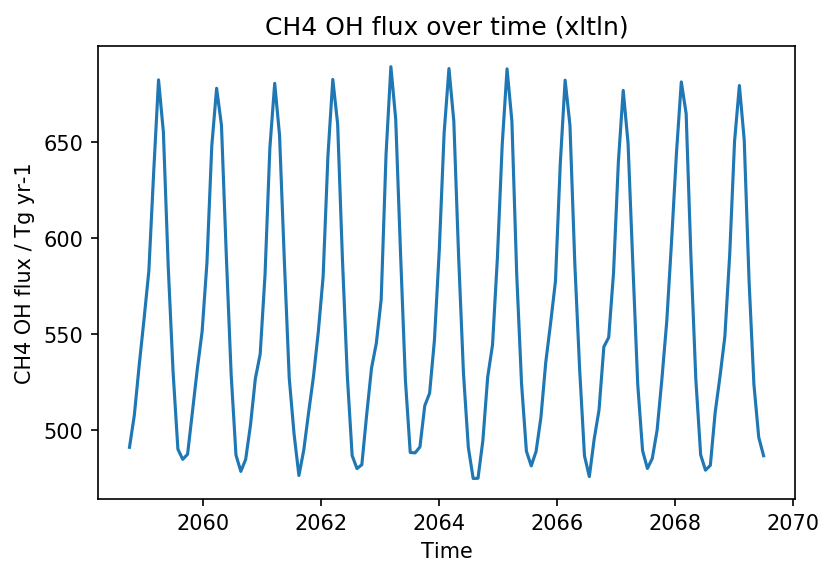

In [29]:
fig = plt.figure(dpi=150)
ax = plt.axes()
ax.plot(dtime,flux_sum_xl)
plt.xlabel('Time')
plt.ylabel('CH4 OH flux / Tg yr-1')
plt.title(f'CH4 OH flux over time (xltln)')

In [41]:
#xltln
ch4_oh_lbc_tg_yr = ch4_oh_lbc*mr_ch4*per_sec_to_per_yr/g_to_Tg
ch4_oh_trop_xg = MA.masked_where(trop_mask_xg.mask,ch4_oh_lbc_tg_yr)
#sum over lat lon alt
flux_sum_xg = np.sum(ch4_oh_trop_xg, axis=(1,2,3))

Text(0.5, 1.0, 'CH4 OH flux over time (xgywn)')

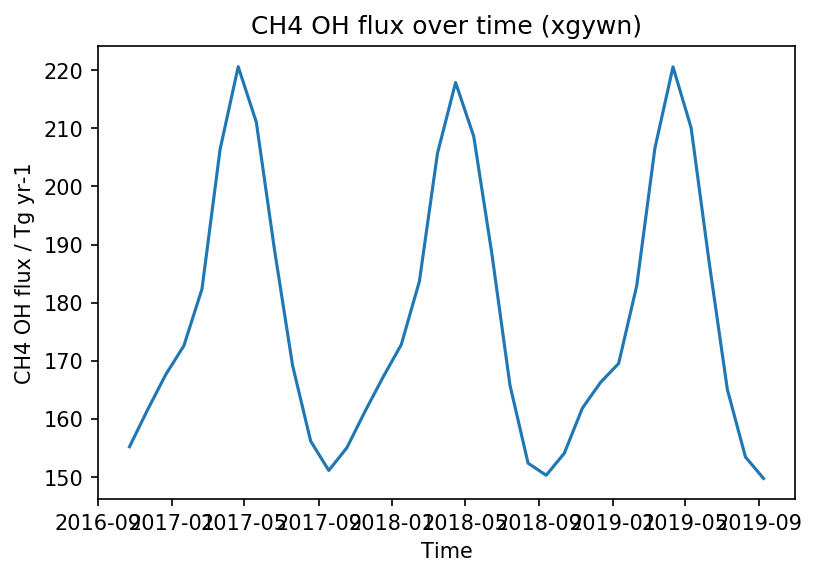

In [42]:
fig = plt.figure(dpi=150)
ax = plt.axes()
ax.plot(dtime_lbc,flux_sum_xg)
plt.xlabel('Time')
plt.ylabel('CH4 OH flux / Tg yr-1')
plt.title(f'CH4 OH flux over time (xgywn)')

In [59]:
mean_ch4_xg_SH = np.int(np.mean(ch4_trop_xg[:,:,:36,:],axis=(0,1,2,3)))
print(f'SH average: {mean_ch4_xg_SH} ppbv')

mean_ch4_xg_NH = np.int(np.mean(ch4_trop_xg[:,:,36:,:],axis=(0,1,2,3)))
print(f'NH average: {mean_ch4_xg_NH} ppbv')
print()
print(f'Interhemispheric gradient: {mean_ch4_xg_NH - mean_ch4_xg_SH} ppbv')

SH average: 1692 ppbv
NH average: 1689 ppbv

Interhemispheric gradient: -3 ppbv
